In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ecc_mt_load = np.loadtxt('/home/krish.shah/GW_Lensing/FF_Computation/NEW_FF/Ecc/ecc_mt.txt')


In [3]:
q_inj = 1/6
l_inj = np.pi/3

In [4]:
mt_inj = np.linspace(40,90,5)
e_inj = np.linspace(0.01,0.4,5)
coordinates = []
for i in range(len(e_inj)):
    for j in range(len(mt_inj)):
        coordinates.append((e_inj[i], mt_inj[j]))

np.savetxt('ecc_mt.txt',coordinates)

In [39]:
FF_MV_IQ = []
for i in range(len(ecc_mt_load)):
    A = np.loadtxt('/home/krish.shah//GW_Lensing/FF_Computation/NEW_FF/Ecc/FF_Values_Ecc__NO_Lensing'+str(ecc_mt_load[i,0])+'_'+str(ecc_mt_load[i,1])+'_'+str(q_inj)+'_'+str(l_inj)+'.txt', dtype=object)
    FF_MV_IQ.append(float(A[0][0]))


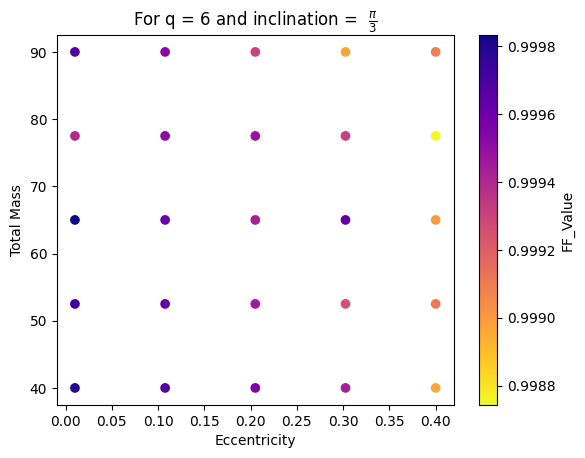

In [40]:

plt.scatter(ecc_mt_load[:, 0], ecc_mt_load[:, 1], c=FF_MV_IQ, cmap='plasma_r')
cbar = plt.colorbar()
cbar.set_label('FF_Value')
plt.xlabel('Eccentricity')
plt.ylabel('Total Mass')
a = l_inj/np.pi
if abs(l_inj) == 0:
    symbolic_q = '0'
elif abs(a) < 1:
    a = np.pi/l_inj
    symbolic_q = r'$\frac{\pi}{' + str(int(a)) + '}$'
elif abs(a) > 1:
    a = l_inj/np.pi
    symbolic_q = str(int(a)) + r'$ \pi ' +  '}$'
plt.title('For q = %i and inclination =  {}'.format(symbolic_q)%(1/q_inj))
plt.show()

In [46]:
phi_c = []

for i in range(len(ecc_mt_load)):
    A = np.loadtxt('/home/krish.shah//GW_Lensing/FF_Computation/NEW_FF/Ecc/FF_Values_Ecc__NO_Lensing'+str(ecc_mt_load[i,0])+'_'+str(ecc_mt_load[i,1])+'_'+str(q_inj)+'_'+str(l_inj)+'.txt', dtype=object)
    input_s = (A[0][4])
    output_string = input_s[:-1]
    phi_c.append(float(output_string))

In [45]:
A[0][4]

'-0.00483907036387448]'

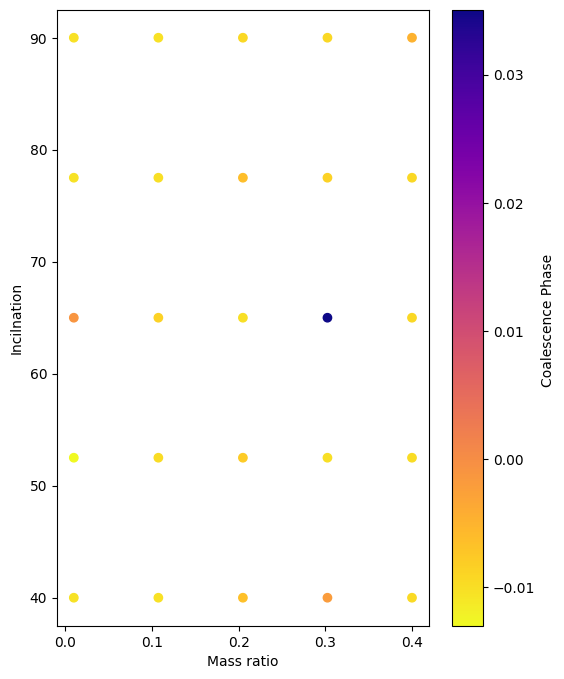

In [47]:
import matplotlib.ticker as ticker
#coordinates = np.array(coordinates)
plt.figure(figsize = (6,8))
plt.scatter(ecc_mt_load[:, 0], ecc_mt_load[:, 1], c=phi_c, cmap='plasma_r')
cbar = plt.colorbar()


plt.xlabel('Mass ratio')
plt.ylabel('Incilnation')
cbar.set_label(r'Coalescence Phase ')
plt.show()

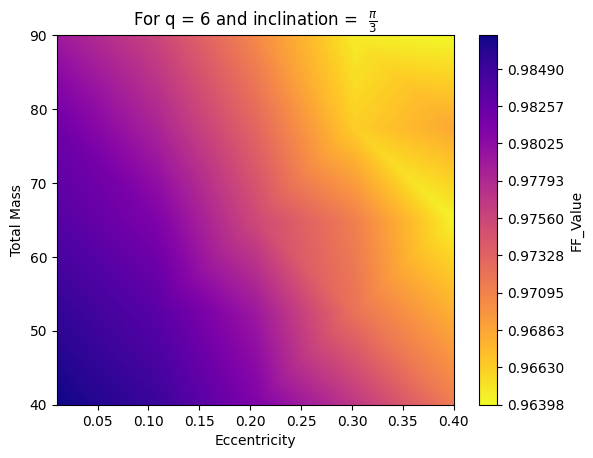

In [8]:
plt.tricontourf(ecc_mt_load[:, 0], ecc_mt_load[:, 1], FF_MV_IQ,1000,alpha = 1, cmap='plasma_r')
cbar = plt.colorbar()
cbar.set_label('FF_Value')
plt.xlabel('Eccentricity')
plt.ylabel('Total Mass')
a = l_inj/np.pi
if abs(l_inj) == 0:
    symbolic_q = '0'
elif abs(a) < 1:
    a = np.pi/l_inj
    symbolic_q = r'$\frac{\pi}{' + str(int(a)) + '}$'
elif abs(a) > 1:
    a = l_inj/np.pi
    symbolic_q = str(int(a)) + r'$ \pi ' +  '}$'
plt.title('For q = %i and inclination =  {}'.format(symbolic_q)%(1/q_inj))
plt.show()

In [12]:
signal = np.exp(1j * np.pi / 2)

# Perform the IFFT
ifft_result = np.fft.ifft([signal])

print(ifft_result)



[6.123234e-17+1.j]


In [176]:
from pycbc.waveform import get_td_waveform
mt_inj = 100.0 #Total mass injected
q_inj = 1/7 #mass ratio injected
l_inj = 0 #inclination injected
inj_params = dict(approximant="IMRPhenomXPHM",
                         mass1=mt_inj / (1 + q_inj), 
                         mass2=mt_inj *q_inj  / (1 + q_inj), 
                         delta_t=1.0/4096, 
                         f_lower=20.0,
                         spin1z = 0,
                         spin2z = 0, 
                         inclination=l_inj,
                         distance = 100,
                         #mode_array = [[2,2]],
                         delta_f =0.01)

#Wf generation
hp,hc = get_td_waveform(**inj_params)



In [178]:
import numpy as np
import pycbc.types
from scipy.signal import hilbert

#delta_t = hp.delta_t
#n = len(hp)
#freqs = np.fft.rfftfreq(n, delta_t)
#time_domain_function = np.fft.irfft( np.exp(-1j*np.pi/2) * np.ones_like(freqs),n)
#convolved_waveform = np.convolve(hp, time_domain_function,mode = 'full')
#
#print(max(hp))

In [181]:
cwf = hilbert(hp)

conwf = pycbc.types.timeseries.TimeSeries(cwf,delta_t=hp.delta_t)

print(conwf.sample_times)
#print(cwf)

[0.00000000e+00 2.44140625e-04 4.88281250e-04 ... 1.59992676e+01
 1.59995117e+01 1.59997559e+01]
[-5.34783320e-24+1.90701692e-24j -5.39614630e-24+1.74259274e-24j
 -5.43922683e-24+1.57717581e-24j ... -5.17177913e-24+2.39195767e-24j
 -5.23559055e-24+2.23191921e-24j -5.29429830e-24+2.07020272e-24j]


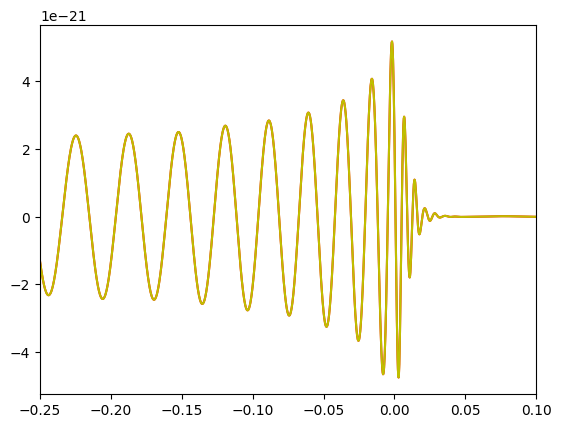

In [184]:
plt.plot(hp.sample_times,hp,'r')
plt.plot( conwf.sample_times+hp.sample_times[0],conwf,'y')
plt.xlim(-0.25,0.1)
plt.show()

In [27]:
xa = [0.1,0.41,0.82,1.21,1.6,2.0,2.4,3.0,3.3,3.6,3.9,4.2,4.6]

ya = [3.67,3.61,3.54,3.44,3.32,3.17,2.93,2.11,1.60,1.04,0.56,0.20,0.00]

xb = [0,0.5,1.0,1.5,2.0,2.5,3.0,3.3,3.6,3.9,4.3,4.6]
yb = [5.36,5.23,5.03,4.79,4.34,3.49,2.45,1.67,1.13,0.63,0.10,0.00]

xc = [0,0.5,1.0,1.5,2.0,2.5,3.0,3.3,3.7,4.0,4.6]
yc = [7.10,6.89,6.55,5.99,5.02,3.75,2.452,1.75,1.09,0.5,0.0]


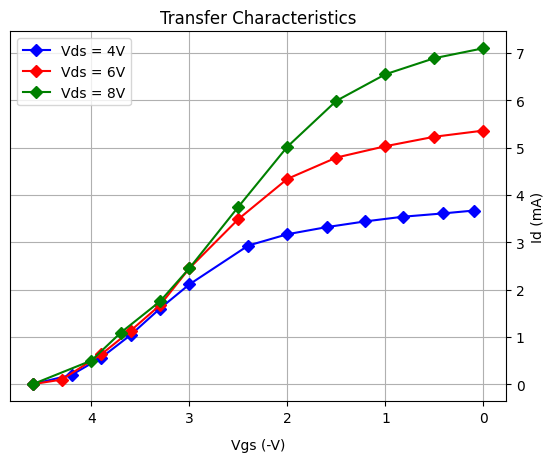

In [38]:
plt.plot(xa,ya,'-bD',label='Vds = 4V')
plt.plot(xb,yb,'-rD',label='Vds = 6V')
plt.plot(xc,yc,'-gD',label='Vds = 8V')

plt.grid()
plt.legend()
plt.title('Transfer Characteristics')
plt.xlabel('Vgs (-V)')
plt.ylabel('Id (mA)')

# Set y-axis to the right
ax = plt.gca()  # Get the current Axes object

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# Invert x-axis and set position
ax.invert_xaxis()
ax.xaxis.set_label_coords(0.5, -0.1)

plt.show()